In [57]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

bids= pd.read_excel('input/Bid_Pricing.xlsx')
bids.head()

,Customer,amount requested,intrest rate,years experi,payment duration,yearly income,white collar,call centre,internet,direct,accept
0,1,3000,0.089446,15,12,44160,0,1,0,0,0
1,2,3000,0.081092,2,12,210680,1,1,0,0,1
2,3,3000,0.071814,6,12,1000000,1,1,0,0,1
3,4,3000,0.091343,10,12,61892,0,0,1,0,0
4,5,3000,0.078224,5,12,235367,1,0,1,0,1


In [4]:
bids.describe()

,Customer,amount requested,intrest rate,years experi,payment duration,yearly income,white collar,call centre,internet,direct,accept
count,13478.000000,13478.000000,13478.000000,13478.000000,13478.000000,13478.000000,13478.000000,13478.000000,13478.000000,13478.000000,13478.000000
mean,6739.500000,6831.354800,0.084901,10.550453,28.259386,140035.161300,0.821116,0.333432,0.333358,0.333210,0.678884
std,3890.907799,3698.551197,0.008644,5.784339,6.104754,63814.512679,0.383269,0.471457,0.471431,0.471378,0.466923
min,1.000000,3000.000000,0.070001,1.000000,12.000000,5000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3370.250000,3000.000000,0.077424,5.000000,24.000000,85943.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,6739.500000,6000.000000,0.084808,11.000000,24.000000,139818.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,10108.750000,12000.000000,0.092400,16.000000,36.000000,194273.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,13478.000000,12000.000000,0.099996,20.000000,36.000000,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
bids.accept.value_counts()

1    9150
0    4328
Name: accept, dtype: int64

In [6]:
bids.shape

(13478, 11)

In [7]:
model= LogisticRegression()

In [8]:
x= bids[['intrest rate']]
x

,intrest rate
0,0.089446
1,0.081092
2,0.071814
3,0.091343
4,0.078224
...,...
13473,0.083425
13474,0.092181
13475,0.088885
13476,0.072267


In [9]:
y= bids.accept.values

In [10]:
model.fit(x,y)

LogisticRegression()

In [11]:
model.coef_

array([[-13.32809375]])

In [12]:
model.intercept_

array([1.88259235])

In [13]:
model.predict(x)

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
predictions= model.predict(x)

In [15]:
(y==predictions).mean()

0.6788841074343375

In [16]:
bid_response_function= model.predict_proba(x)[:,1]

In [17]:
bid_response_function.min()

0.6340963096325309

In [18]:
### a customer is aking for a loan of 10000 USD on 24 month ,
#what will be the intrest rate to maximize the contribution knowing that the cost of initalizing the loan is 100 USD 

In [19]:
intrest_sim= np.linspace(0.07,0.15,500)

In [20]:
probability_p= model.predict_proba(intrest_sim.reshape(-1,1))[:,1]

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
#max(profit)= bid response function * ((intrest rate *10000)-100)

In [22]:
expected= (probability_p * intrest_sim*10000)-100

Text(0.5, 1.0, 'expected contribution')

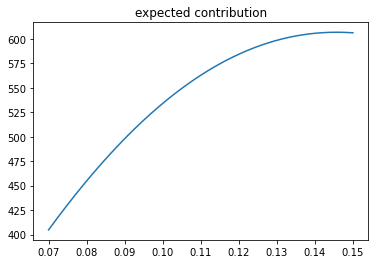

In [23]:
plt.plot(intrest_sim,expected)
plt.title(label='expected contribution')


In [24]:
import seaborn as sns

In [25]:
bids.head()

,Customer,amount requested,intrest rate,years experi,payment duration,yearly income,white collar,call centre,internet,direct,accept
0,1,3000,0.089446,15,12,44160,0,1,0,0,0
1,2,3000,0.081092,2,12,210680,1,1,0,0,1
2,3,3000,0.071814,6,12,1000000,1,1,0,0,1
3,4,3000,0.091343,10,12,61892,0,0,1,0,0
4,5,3000,0.078224,5,12,235367,1,0,1,0,1


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yearly income'>

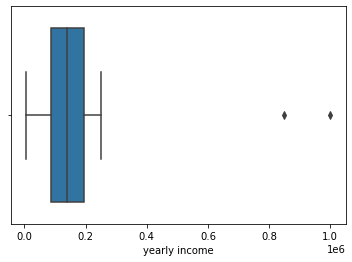

In [26]:
sns.boxplot(bids['yearly income'])

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount requested '>

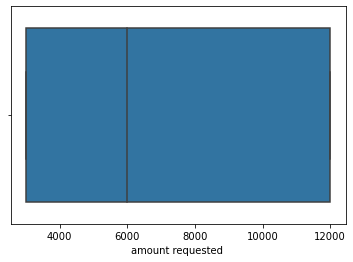

In [27]:
sns.boxplot(bids.iloc[:,1])

In [28]:
##minmax_scaler
bids_scaled= bids.copy()
bids_scaled['yearly income']= (bids['yearly income']-bids['yearly income'].min())/(bids['yearly income'].max()-bids['yearly income'].min())
bids_scaled.head()

,Customer,amount requested,intrest rate,years experi,payment duration,yearly income,white collar,call centre,internet,direct,accept
0,1,3000,0.089446,15,12,0.039357,0,1,0,0,0
1,2,3000,0.081092,2,12,0.206714,1,1,0,0,1
2,3,3000,0.071814,6,12,1.000000,1,1,0,0,1
3,4,3000,0.091343,10,12,0.057178,0,0,1,0,0
4,5,3000,0.078224,5,12,0.231525,1,0,1,0,1


In [29]:
X= bids_scaled.drop(['accept','Customer'],axis=1).values
y= bids_scaled.accept.values

In [30]:
X

array([[3.00000000e+03, 8.94461704e-02, 1.50000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+03, 8.10923130e-02, 2.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+03, 7.18135681e-02, 6.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.20000000e+04, 8.88848724e-02, 1.80000000e+01, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20000000e+04, 7.22671963e-02, 8.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.20000000e+04, 8.18828709e-02, 2.00000000e+01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [31]:
model_seg= LogisticRegression(C = np.inf, solver = "lbfgs", penalty = "l2")
model_seg.fit(X,y)

LogisticRegression(C=inf)

In [32]:
predictions=model_seg.predict(X)

In [33]:
###accuracy

(y==predictions).mean()



0.7153138447840925

In [34]:
from sklearn.model_selection import GridSearchCV
from patsy import dmatrices,build_design_matrices

In [35]:
### Grid search cross validation

model_cv= LogisticRegression(penalty='l2')
param_grid= {'C': np.linspace(0.01,50,40)}
grid_cv= GridSearchCV(model_cv,param_grid,scoring='roc_auc')

In [36]:
grid_model=grid_cv.fit(X,y)

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [37]:
grid_model.best_params_
grid_model.best_score_

0.6848612265213305

In [38]:
prediction_cv= grid_model.predict(X)
acc= (y== prediction_cv).mean()
acc

0.7081911262798635

In [40]:
### model interaction
###import bidding prices without spaces
### Grid search cross validation

model_cv= LogisticRegression(penalty='l2')
param_grid= {'C': np.linspace(0.01,50,40)}
grid_cv= GridSearchCV(model_cv,param_grid,scoring='roc_auc')
bids= pd.read_excel('input/Bid_Pricing_no_space.xlsx')
bids_scaled= bids.copy()
bids_scaled['yearly_income']= (bids_scaled['yearly_income']-bids_scaled['yearly_income'].min())/(bids_scaled['yearly_income'].max()-bids_scaled['yearly_income'].min())

In [41]:
bids_scaled

,Customer,amount_requested,intrest_rate,years_experi,payment_duration,yearly_income,white_collar,call_centre,internet,direct,accept
0,1,3000,0.089446,15,12,0.039357,0,1,0,0,0
1,2,3000,0.081092,2,12,0.206714,1,1,0,0,1
2,3,3000,0.071814,6,12,1.000000,1,1,0,0,1
3,4,3000,0.091343,10,12,0.057178,0,0,1,0,0
4,5,3000,0.078224,5,12,0.231525,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13473,13474,12000,0.083425,5,36,0.061353,0,1,0,0,0
13474,13475,12000,0.092181,1,36,0.245458,1,1,0,0,1
13475,13476,12000,0.088885,18,36,0.062362,0,1,0,0,1
13476,13477,12000,0.072267,8,36,0.189906,1,0,1,0,1


In [42]:
matrix1= dmatrices('accept ~ amount_requested * intrest_rate * years_experi*payment_duration*yearly_income*white_collar*call_centre*internet*direct',bids_scaled)

In [43]:
matrix1

(DesignMatrix with shape (13478, 1)
   accept
        0
        1
        1
        0
        1
        1
        1
        0
        1
        1
        0
        0
        1
        1
        1
        1
        1
        1
        1
        1
        0
        1
        1
        1
        1
        0
        1
        1
        1
        0
   [13448 rows omitted]
   Terms:
     'accept' (column 0)
   (to view full data, use np.asarray(this_obj)),
 DesignMatrix with shape (13478, 512)
   Columns:
     ['Intercept',
      'amount_requested',
      'intrest_rate',
      'amount_requested:intrest_rate',
      'years_experi',
      'amount_requested:years_experi',
      'intrest_rate:years_experi',
      'amount_requested:intrest_rate:years_experi',
      'payment_duration',
      'amount_requested:payment_duration',
      'intrest_rate:payment_duration',
      'amount_requested:intrest_rate:payment_duration',
      'years_experi:payment_duration',
      'amount_requested:years_experi:p

In [44]:
grid_inter= grid_cv.fit(matrix1[1],np.ravel(matrix1[0]))


/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jerrychien/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [45]:
grid_inter.best_score_

0.8163615883082038

In [46]:
prediction_inter= grid_inter.predict(matrix1[1])

In [47]:
prediction_inter

array([1., 1., 1., ..., 0., 1., 1.])

In [48]:
(y== prediction_inter).mean()

0.7397981896423802

In [49]:
### a customer who is applying for a 200000 loan ,yearly income of 120000, internet, 
#12 years of experience,white collar،payment duration of 36 month 
prediction_data= bids_scaled.iloc[0:500,1:10]
prediction_data['amount_requested']=20000
prediction_data['intrest_rate']=np.linspace(0.07,0.15,500)
prediction_data['years_experi']=12
prediction_data['payment_duration']=36
prediction_data['yearly_income']= (120000- bids['yearly_income'].min())/(bids['yearly_income'].max()- bids['yearly_income'].min())
prediction_data['white_collar']=1
prediction_data['call_centre']=0
prediction_data['internet']=1
prediction_data['direct']=0
prediction_data['accept']=1

In [50]:
prediction_matrix= dmatrices('accept~amount_requested * intrest_rate * years_experi*payment_duration*yearly_income*white_collar*call_centre*internet*direct',prediction_data)

In [51]:
predicted_prob= grid_inter.predict_proba(prediction_matrix[1])

In [52]:
bid_response=predicted_prob[:,1]

In [53]:
expected_contr= (bid_response * intrest_sim*20000)-700

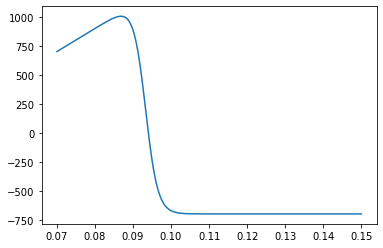

In [54]:
plt.plot(prediction_data['intrest_rate'],expected_contr)

In [55]:
data= pd.DataFrame({'bid_response': bid_response,'cont':expected_contr,'intrest_rate':prediction_data['intrest_rate']})

In [56]:
data[data.cont==max(data.cont)]

,bid_response,cont,intrest_rate
105,0.981633,1004.776612,0.086834
